# Sentiment analysis


## Introduction

Sentiment analysis is the process of identifying and characterising the emotions or the opinions that are expressed within machine-readable texts. Sentiment analysis applications commonly make use of lists of words that are indicative of specific sentiments. Such lists or lexicons usually specify whether the words refer to negative or to positive emotions. By calculating the frequencies of these affective words, and by examining the contexts in which these words are used, such tools generally aim to calculate specific sentiment scores. 

The most basic types of sentiment analysis approaches classify text fragments simply as either positive or negative. Valence-based approaches, by contrast, also consider the intensity of the emmotions that are expressed, and aim to calculate more nuanced sentiment scores. 

This notebook discusses [Vader](https://github.com/cjhutto/vaderSentiment), which is available both as a separate package and as part of Python's NLTK library. Vader stands for the Valence Aware Dictionary and sEntiment Reasoner. Vader makes use of [a list of words](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt) whose affective connotations have been evaluated manually by human volunteers. The word 'great', for instance has been assigned a positive score of 3.1, while the word 'terrible' has been scored at -2.1. Vader used these numbers to evaluate the sentiments in text fragments. 




## Installing Vader

To work with Vader, it obviously needs to be installed first. 

In [1]:
import sys
!pip install vaderSentiment

If, for some reason, you are unable to install the package, you can also try to download the vader lexicon using NLTK.

In [2]:
import nltk
nltk.download('vader_lexicon', quiet=False)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/peter/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

If you managed to install Vader successfully, you should be able to import the `SentimentIntensityAnalyser` object from the vaderSentiment library in your code. 

In the code below, this object is renamed into `ana`. This object will function as a sentiment analyser. 

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

ana = SentimentIntensityAnalyzer()

When you have downloader Vader via NLTK, you should place a hash before the first line and remove the hash in front of the second command that is given. 


## Sentiment ratings

This object `SentimentIntensityAnalyser` object contains a method named `polarity_scores` which can calculate the sentiment scores. The method only demands a string as a parameter. 

The method returns a dictionary with four keys:

* `neg` gives a score for the level of negativity
* `neu` assesses the level of neutrality
* `pos` assignes a score for the positivity
* the `compound` score, finally, is an overall assessment of the sentiments that are expressed. It is the sum of the first three ratings, but rescaled on a range in between -1 and + 1. 

When you run the code below, you will see that first sentence is considered to be 44% neutral and 55% positive, resulting in a positive score of 0.8225. 

The second sentence is given a score of 0.494 for negativity and a score 0.506 on the neutrality scale. The score for positiviy is 0.0. On the whole, the sentence received a negative score of -0.5994.  

In [9]:
scores = ana.polarity_scores("A thing of beauty is a joy forever")

for s in scores:
    print( f'{s}: {scores[s]}'  )
    
print('\n')
    
scores = ana.polarity_scores("April is the cruellest month")

for s in scores:
    print( f'{s}: {scores[s]}'  )

neg: 0.0
neu: 0.441
pos: 0.559
compound: 0.8225


neg: 0.494
neu: 0.506
pos: 0.0
compound: -0.5994


Note that Vader also takes into account emoticon codes such as ':)'.  Without the emoticon, the positivity score for the sentence blow is 0.23. With the added smiley code, the positivity score rises to 0.338. 

In [5]:
scores = ana.polarity_scores("It was the best of times, it was the worst of times.  :)")

print( f'Positive: { scores["pos"] }' )
print( f'Negative: { scores["neg"] }' )
print( f'Compound: { scores["compound"] }' )

Positive: 0.338
Negative: 0.192
Compound: 0.4767


## Context 

Vader does not simply copy the scores from the lexicon. It also takes into account properties such as interpunction and capitalisation, and it can be sensitive to the broader contexts of the words in the lexicon. 

Capitalisation, for example, increases the intensity of an emotion. 

In [13]:
scores = ana.polarity_scores("It was the BEST of times, it was the worst of times.")

print( f'Positive: { scores["pos"] }' )
print( f'Negative: { scores["neg"] }' )

print('\n')

scores = ana.polarity_scores("It was the best of times, it was the WORST of times.")

print( f'Positive: { scores["pos"] }' )
print( f'Negative: { scores["neg"] }' )


Positive: 0.259
Negative: 0.215


Positive: 0.327
Negative: 0.219


Insenifiers such as 'very' or 'really' likewise raise the ratings for particular emotions. The same is the case for exclamation marks. Vader also knows that the word 'not' entails a negation and that the value of a positive word following 'not' should in fact be viewed as a negative word. 

In [7]:
scores = ana.polarity_scores("This novel is good.")

print( f'Overall score: { scores["compound"] }' )

scores = ana.polarity_scores("This novel is really good!")

print( f'Overall score: { scores["compound"] }' )

scores = ana.polarity_scores("This novel is extremely GOOD!")

print( f'Overall score: { scores["compound"] }' )

scores = ana.polarity_scores("This novel is not good.")

print( f'Overall score: { scores["compound"] }' )

Overall score: 0.6369
Overall score: 0.6989
Overall score: 0.7592
Overall score: -0.0274


## Using Vader on longer texts

VADER's `polarity_scores()` methods gives good results for relatively short sentences. When applied to longer texts (e.g. the full text of a novel) however, the scores quickly become meaningless. 

To assess the sentiments exoressed in longer texts, we can firstly divide this text into its seperate sentences, using `nltk`. Next, we can alculate the average of the compound scores assigned to all of these sentences.  

The code below works with a dictionary named `sent_scores`. It saves all the sentences that are fiuond in the text as the keys of the dictionary. The compound sentiment scores are saved as the values belonging to these sentences. 

Eventually, we can find the most negative and the most positive sentences using this `sent_scores` dictionary. We can also calculate the avage score for the full text, by dividing the sum of all the scores by the total number of sentences.   

In [23]:
from nltk.tokenize import sent_tokenize
from os.path import join
import tdm

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()

sent_scores = dict()

dir = 'Corpus'
text = 'HeartOfDarkness.txt'


text = open( join( dir, text ) )

for p in text:
    sent = sent_tokenize(p)
    for s in sent:
        ratings = ana.polarity_scores(s)
        sent_scores[s] = ratings['compound']


        
max = 5
i = 0 

print('Most negative sentences:')
        
for s in tdm.sortedByValue(sent_scores):
    print( f'{s} [{sent_scores[s]}]')
    i += 1
    if i == max:
        break
                
print('\nMost positive sentences:')
                
        
for s in reversed( tdm.sortedByValue(sent_scores) ):
    print( f'{s} [{sent_scores[s]}]')
    i += 1
    if i % max == 0:
        break
        
values = sent_scores.values()
total = sum(values)        
        
print( f' { total  / len(sent_scores) } '  )


Most negative sentences:
Her face had a tragic and fierce aspect of wild sorrow and of dumb pain mingled with the fear of some struggling, half-shaped resolve. [-0.9468]
And at last, in its curved and imperceptible fall, the sun sank low, and from glowing white changed to a dull red without rays and without heat, as if about to go out suddenly, stricken to death by the touch of that gloom brooding over a crowd of men. [-0.9382]
He was lying on his back with closed eyes, and I withdrew quietly, but I heard him mutter, 'Live rightly, die, die...' I listened. [-0.9313]
I wanted to push on; but the manager looked grave, and told me the navigation up there was so dangerous that it would be advisable, the sun being very low already, to wait where we were till next morning. [-0.9182]
"He was becoming confidential now, but I fancy my unresponsive attitude must have exasperated him at last, for he judged it necessary to inform me he feared neither God nor devil, let alone any mere man. [-0.917]

Such aggregate score, representing the overall sentiment expressed in a text, can obviously be calculated for all the texts in your corpus. The code below opens all the files in the folder named `Corpus`, and applies the same code that was discussed above to each of these files. The average scores are assigned to a dictionary named `all_scores`. 

In [17]:
from nltk.tokenize import sent_tokenize
from os.path import join
import os
import tdm
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()

dir = 'Corpus'
all_scores = dict()

for file in os.listdir(dir):
    if re.search( r'txt$' , file ):
        sent_scores = dict()

        with open( join( dir, file ) , encoding = 'utf-8') as file_handler:
            full_text = file_handler.read()
            sent = sent_tokenize(full_text)
            for s in sent:
                ratings = ana.polarity_scores(s)
                sent_scores[s] = ratings['compound']
                
        values = sent_scores.values()
        total = sum(values)        
        average_score = total  / len(sent_scores) 
        print( f'{file} {average_score}' )
        all_scores[ tdm.removeExtension(file) ] = average_score


print('Done!')

SonsandLovers.txt 0.03560572658492042
Ivanhoe.txt 0.11906237671786564
TheHappyPrince.txt 0.10657085201793719
ThroughtheLookingGlass.txt 0.06654704714640189
HeartofDarkness.txt 0.010815002089427515
MobyDick.txt 0.033175993868165554
ARoomWithaView.txt 0.05569756690997595
TreasureIsland.txt 0.04196688506688493
ATaleofTwoCities.txt 0.04312929734021455
PrideandPrejudice.txt 0.174901956673654
VanityFair.txt 0.15614840997483295
Done!


The scores that wer obtained in this way can be visualised in a bar plot. 

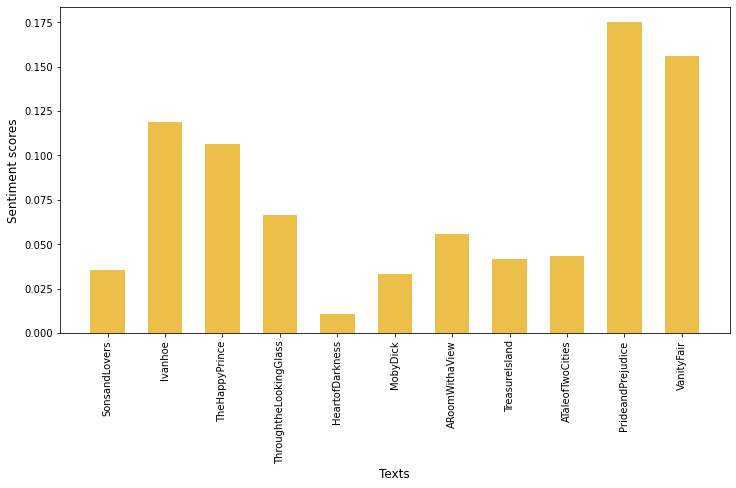

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


x_axis = list( all_scores.keys() )
y_axis = list( all_scores.values() )

fig = plt.figure( figsize=( 12 ,6 ) )
ax = plt.axes()


bar_width = 0.6
opacity = 0.8

ax.bar( x_axis , y_axis , width = bar_width, alpha = opacity , color = '#e6b01c')

plt.xticks(rotation= 90)

ax.set_xlabel('Texts' , fontsize= 12)
ax.set_ylabel('Sentiment scores' , fontsize = 12 )


plt.show()
#plt.savefig('barchart.jpg')

Focusing on an individual text, it may also be interesting to examine how the sentiments develop as this text progresses. The notebook on 'Tokenisation' explained that you can create distribution graph indicating the frequencies of a given word within different consecutive segments of the text. A similar principle can applied using sentiment scores. 

The code below firstly divides a full text into segments. The number of segments is determined by the variable `nr_segments`. To ensure that each segment contains the same number of sentences, the total number of sentences is divided by the value assigned to `nr_segments`.  

*Heart of Darkness*, for instance, contains 2430 sentences. If the number of segments to be created is set to 30, this means that each segment will contain (2430/30=) 81 sentences. 

The code then calculates the average sentiment scores for the sentences in these segments. The average scores are assigned to `all_scores`. 

In [21]:
nr_segments = 30
all_scores = dict()

from nltk.tokenize import sent_tokenize
from os.path import join
import tdm

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
ana = SentimentIntensityAnalyzer()

dir = 'Corpus'
text = 'PrideAndPrejudice.txt'
path = join( dir, text ) 
            
with open( path , encoding = 'utf-8' ) as file_handler:
    full_text = file_handler.read()
        
sent = sent_tokenize(full_text)
print( len(sent) )
segment_size = round( len(sent) / nr_segments )
print( segment_size )

total = 0 
for i in range( 0,len(sent) ):
    ratings = ana.polarity_scores(sent[i])
    total += ratings['compound']
    #print( ratings['compound'] , ' => ' , total )
    if i % segment_size == 0:
        all_scores[i] = total / segment_size
        total = 0 
    
if total != 0:
    all_scores[i] = total / segment_size
    


5852
195


The values in this `all_scores` dictionary can be visualised using a line plot.

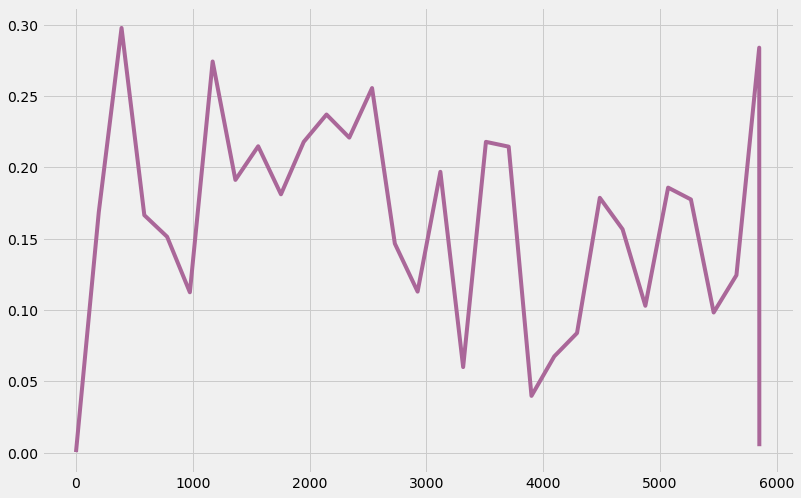

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

fig = plt.figure( figsize = ( 12, 8))
ax = sns.lineplot(x= all_scores.keys() , y= all_scores.values() , color  = '#AA6799' )

## Bibliography

C.J. Hutto Eric Gilbert, "VADER: A Parsimonious Rule-based Model for
Sentiment Analysis of Social Media Text", in: *ICWSM 2014* <[https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8109)>
